In [1]:
# Python 3.9.9
import numpy as np
import pandas as pd
import scanpy as sc

In [2]:
sc.settings.verbosity = 0             # verbosity: errors (0), warnings (1), info (2), hints (3)
sc.logging.print_header()
sc.settings.set_figure_params(dpi=80, facecolor='white')

2023-10-06 16:09:39.773054: I tensorflow/core/util/port.cc:110] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-10-06 16:09:39.775330: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-10-06 16:09:39.813943: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-10-06 16:09:39.814772: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-10-06 16:09:41.628912: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Co

scanpy==1.9.3 anndata==0.8.0 umap==0.5.2 numpy==1.22.1 scipy==1.7.3 pandas==1.3.5 scikit-learn==1.0.2 statsmodels==0.13.1 python-igraph==0.9.9 pynndescent==0.5.5


In [90]:
DATA_PATH = 'scGND/data/Zeisel/outputs/'
DATA_TYPE = '10X'
OUTPUT_PATH = 'scGND/outputs/zeisel/scanpy_outputs/'

# Load data

In [4]:
# Load the data
#adata = sc.read_10x_mtx(DATA_PATH, var_names='gene_symbols', cache=True)

In [58]:
import load

scdata = load.load_10X_data(DATA_PATH, is_cell_by_gene=True, is_genes=False)


2023-10-06 17:25:18,535 - --------> Loading from 10X data ...
2023-10-06 17:25:38,835 - ----------------> Matrix has 3005 cells and 19972 genes


In [6]:
scdata.raw.print_data()

SCData.raw: Preprossed raw data (loaded raw data if no preprocessing).
------raw.expr: numpy.narray, shape=(2717, 24175), dtype=int64.
------raw.log: None
------raw.cell: numpy.narray, shape=(2717,), dtype=object.
------raw.gene: numpy.narray, shape=(24175, 1), dtype=object.
------raw.lct: None


In [59]:
obs = pd.DataFrame({}, index=scdata.raw.cell)
var = pd.DataFrame({}, index=scdata.raw.gene)

adata = sc.AnnData(X=scdata.raw.expr, obs=obs, var=var)

/scratch/1604513.1.korolevgroup-gpu-pub/ipykernel_2693008/1475689758.py:4: FutureWarning: X.dtype being converted to np.float32 from int64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.
  adata = sc.AnnData(X=scdata.raw.expr, obs=obs, var=var)
/usr2/postdoc/ycliu137/.local/lib/python3.9/site-packages/anndata/_core/anndata.py:1830: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


In [60]:
adata

AnnData object with n_obs × n_vars = 3005 × 19972

# Preprocessing

In [61]:
sc.pp.normalize_total(adata, target_sum=1e4)

In [62]:
sc.pp.log1p(adata)

In [63]:
sc.pp.highly_variable_genes(adata, min_mean=0.0125, max_mean=3, min_disp=0.5)

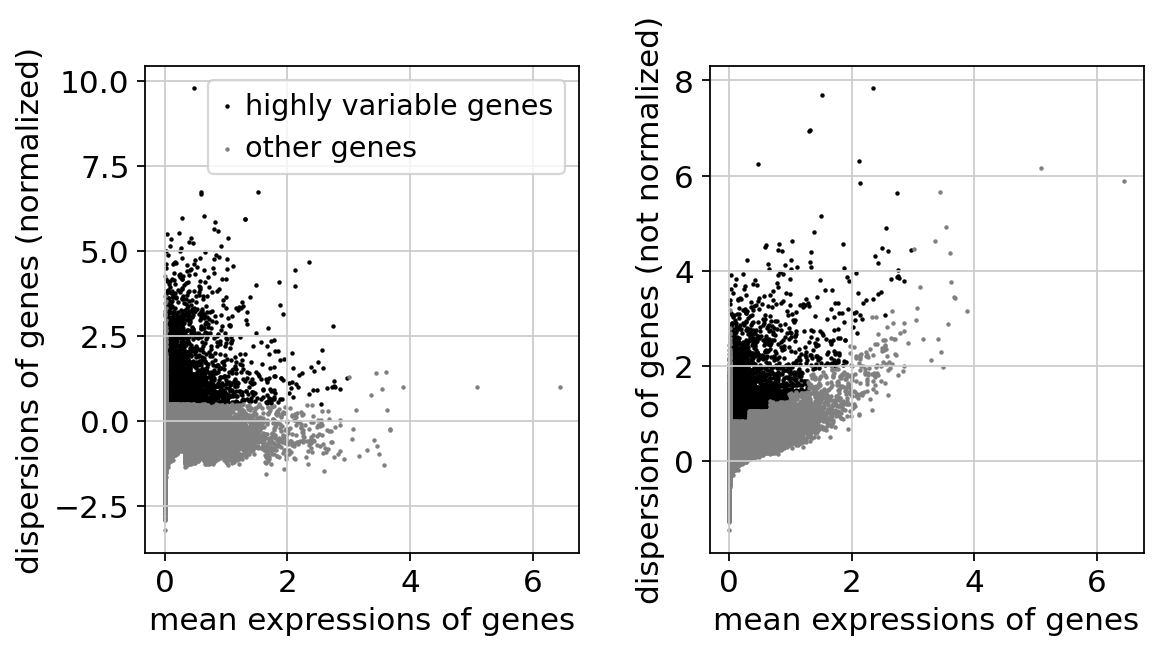

In [64]:
sc.pl.highly_variable_genes(adata)

In [65]:
adata.raw = adata

In [66]:
sc.tl.pca(adata, svd_solver='arpack')

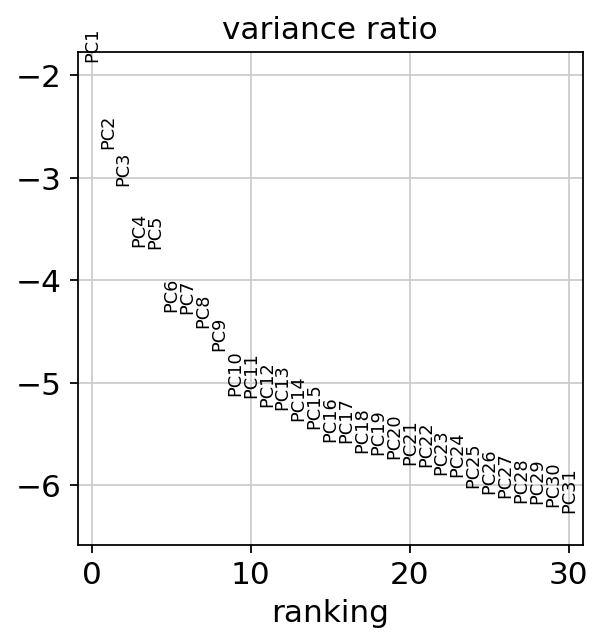

In [67]:
sc.pl.pca_variance_ratio(adata, log=True)

In [68]:
# Find neighbors
sc.pp.neighbors(adata, n_neighbors=10, n_pcs=40)

In [69]:
sc.tl.umap(adata)

# Load labels

In [73]:
import numpy
labels = numpy.loadtxt(DATA_PATH+"labels.csv", delimiter=",")
labels = labels.astype(int)
print(labels)
print(labels.max())
print(numpy.unique(labels))

[1 1 1 ... 6 6 6]
7
[1 2 3 4 5 6 7]


In [74]:
adata.obs['labels'] = labels

In [100]:
sc.tl.leiden(adata, resolution=0.132)

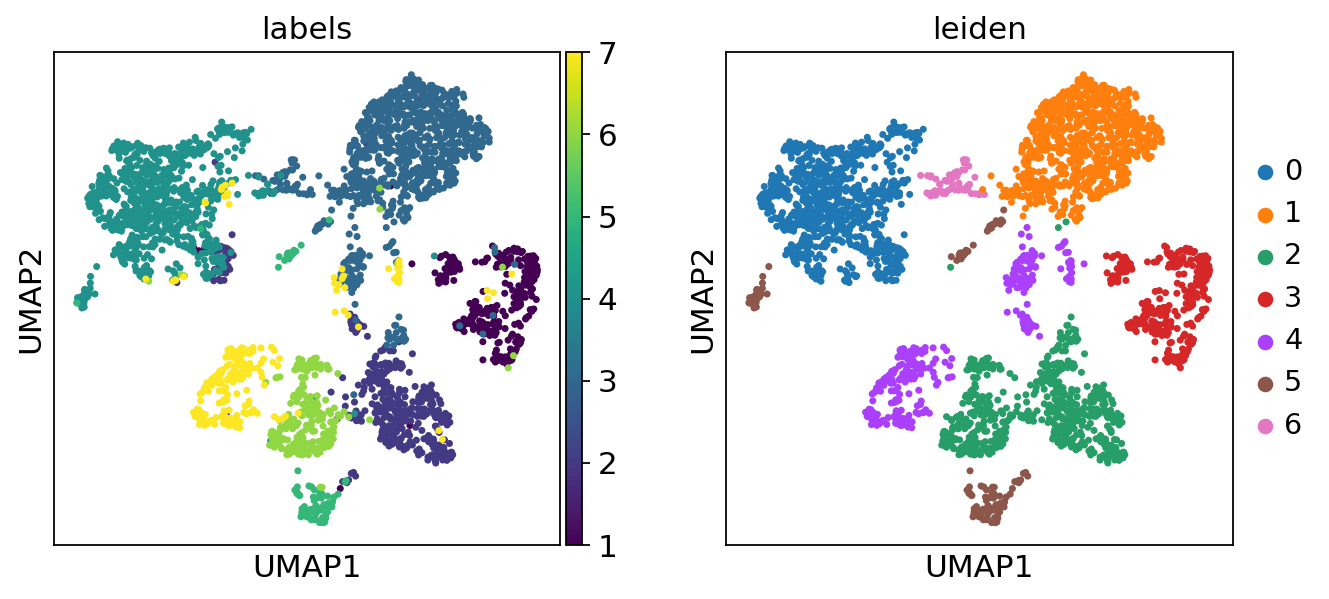

In [101]:
sc.pl.umap(adata, color=["labels",'leiden'])

In [102]:
import numpy


umap_data = adata.obsm['X_umap']

numpy.savetxt(OUTPUT_PATH+'scanpy_umap.csv', umap_data, delimiter=',')

#umap_data.to_csv(OUTPUT_PATH+'scanpy_umap.csv', index=False, header=False)

cluster_labels = adata.obs[['leiden']]

# Save the cluster labels to a CSV file
cluster_labels.to_csv(OUTPUT_PATH+'scanpy_cluster_label.csv', index=False, header=False)
    
    
    